# Neural networks with PyTorch

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [19]:
# Importing necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt


Now we're going to build a larger network that can solve a (formerly) difficult problem, identifying text in an image. Here I used the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels, you can see a sample below

Goal is to build a neural network that can take one of these images and predict the digit in the image.

Imported dataset which is provided through the `torchvision` package.

In [3]:
from torchvision import datasets, transforms

# Defined a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Downloaded and loaded the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


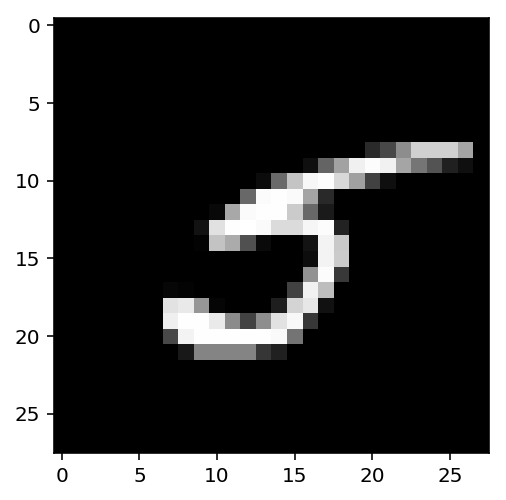

In [5]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [6]:
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
#784 inputs and 256 hidden units
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

out.shape

torch.Size([64, 10])

In [7]:
print(out)

tensor([[-1.5486e+01, -8.0676e+00,  1.4506e+01,  4.9789e+00, -1.8788e+00,
          4.9462e+00,  2.7894e+00, -5.2677e-01, -1.3995e-01,  2.2458e+01],
        [-1.1930e+01, -1.1400e+00,  7.0504e+00,  8.1962e+00, -2.9110e+00,
          3.9464e+00,  1.3244e+01,  1.6190e+00,  5.0979e+00,  8.2174e+00],
        [-2.1003e+01, -6.3166e+00,  1.0044e+01,  1.1834e+01,  6.9733e+00,
          8.1757e+00,  5.1517e+00,  4.8387e+00,  9.3745e+00,  1.1599e+01],
        [-6.9156e+00, -9.4525e+00,  1.0395e+01,  1.0386e+01,  4.0004e+00,
          1.3224e+00,  1.3717e+01, -1.9694e+00, -1.4830e+00,  1.8023e+01],
        [-1.3304e+01,  1.8193e+00,  1.1966e+01, -3.0153e+00,  6.8148e+00,
          5.6082e+00,  1.1953e+01,  2.0968e+00,  2.0487e+00,  2.7153e+01],
        [-6.5203e+00,  6.6376e+00,  7.2060e+00,  9.8016e+00,  2.2520e+00,
          1.3880e+01,  9.3102e+00,  3.0145e+00,  4.7866e-01,  1.0900e+01],
        [-1.5000e+01, -8.0401e+00,  4.5126e+00,  2.1829e+00,  9.2243e+00,
          1.6191e+00,  1.2477e+0

In [8]:
def softmax(x):
    ##Implemented the softmax function here
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

# Here, out is the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)


print(probabilities.shape)
#sum to 1
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with PyTorch

PyTorch provides a module `nn` that makes building networks much simpler. Here I built the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.

In [9]:
from torch import nn

In [10]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [11]:
#text representation of created network
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

Defined the network somewhat more concisely and clearly using the `torch.nn.functional` module.

In [12]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x
    
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [13]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Output layer with softmax activation
        x = F.softmax(self.fc3(x), dim=1)
        
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### Initializing weights and biases

The weights and such are automatically initialized, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the defined layer, you can get them with `model.fc1.weight` for instance.

In [14]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0007, -0.0230, -0.0043,  ...,  0.0154, -0.0063, -0.0027],
        [-0.0014, -0.0310, -0.0271,  ...,  0.0015, -0.0051,  0.0081],
        [-0.0273,  0.0003, -0.0231,  ..., -0.0167,  0.0111,  0.0003],
        ...,
        [-0.0103, -0.0161,  0.0298,  ...,  0.0275,  0.0241, -0.0345],
        [ 0.0236,  0.0286,  0.0276,  ..., -0.0317,  0.0193,  0.0056],
        [ 0.0348,  0.0140, -0.0261,  ...,  0.0204, -0.0170,  0.0075]],
       requires_grad=True)
Parameter containing:
tensor([-1.9806e-02,  9.1899e-03,  6.8317e-04, -4.7218e-03, -3.0696e-02,
         1.4301e-03, -2.4158e-02, -3.3062e-02,  1.2308e-02, -1.5913e-02,
        -1.2986e-02, -3.2790e-02, -5.7118e-03,  3.3622e-03, -2.5726e-02,
        -1.5705e-02, -2.4558e-02,  2.6179e-02, -2.2720e-02,  1.3845e-02,
         1.4443e-02,  1.7644e-02, -3.3938e-02, -2.4610e-02,  1.9872e-02,
        -1.6334e-02,  2.2869e-02, -2.6886e-02, -2.5287e-02,  2.7901e-02,
         2.8827e-02,  1.6726e-02, -2.9057e-02,  3.5054e-0

For custom initialization, we want to modify these tensors in place. These are actually autograd *Variables*, so we need to get back the actual tensors with `model.fc1.weight.data`. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [15]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0118,  0.0177, -0.0153,  ...,  0.0053, -0.0068,  0.0004],
        [ 0.0067,  0.0125,  0.0096,  ..., -0.0148, -0.0003,  0.0174],
        [ 0.0016, -0.0027,  0.0180,  ...,  0.0072,  0.0109,  0.0183],
        ...,
        [ 0.0031,  0.0052,  0.0070,  ..., -0.0225,  0.0183,  0.0065],
        [ 0.0019,  0.0036, -0.0137,  ...,  0.0079,  0.0170, -0.0006],
        [-0.0014, -0.0023, -0.0029,  ..., -0.0202, -0.0104, -0.0022]])

### Forward pass

Now that we have a network, let's see what happens when we pass in an image.

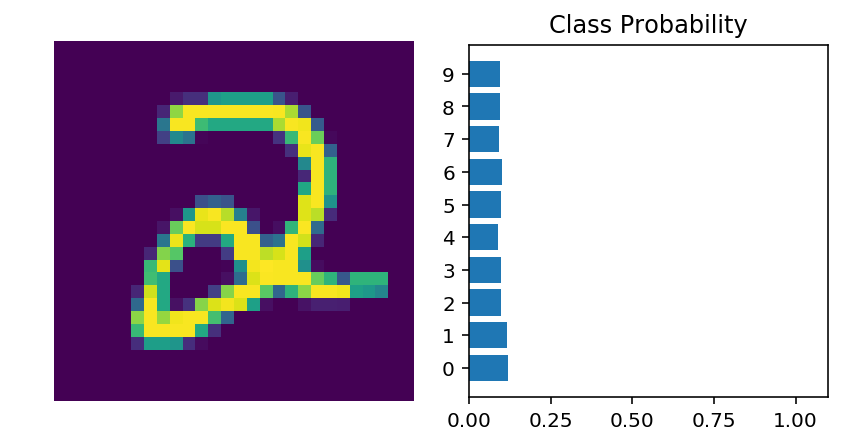

In [22]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random!

### Using `nn.Sequential`

PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, `nn.Sequential` ([documentation](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential)). Using this to build the equivalent network:

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


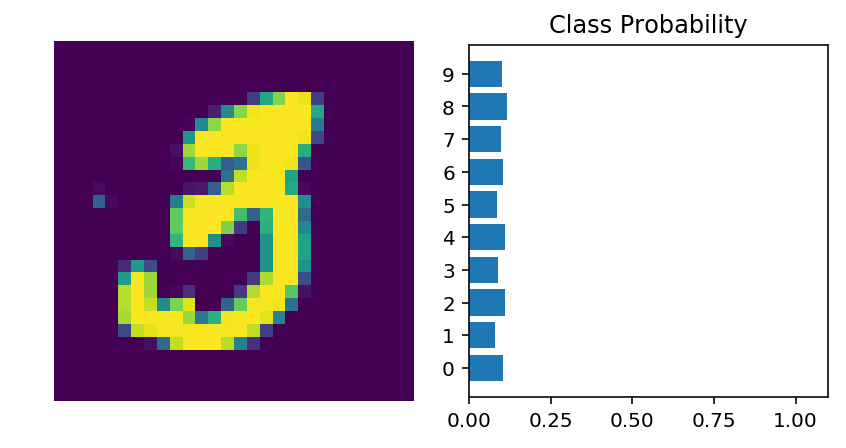

In [25]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

Here our model is the same as before: 784 input units, a hidden layer with 128 units, ReLU activation, 64 unit hidden layer, another ReLU, then the output layer with 10 units, and the softmax output.

The operations are availble by passing in the appropriate index. For example, if you want to get first Linear operation and look at the weights, you'd use `model[0]`.

In [26]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0263,  0.0277, -0.0270,  ..., -0.0032,  0.0014, -0.0031],
        [-0.0073,  0.0067,  0.0295,  ..., -0.0271,  0.0183,  0.0336],
        [-0.0355,  0.0199, -0.0100,  ...,  0.0254,  0.0280,  0.0322],
        ...,
        [-0.0055, -0.0192,  0.0082,  ...,  0.0237, -0.0004,  0.0266],
        [ 0.0226, -0.0143,  0.0298,  ...,  0.0226,  0.0344, -0.0349],
        [-0.0356, -0.0103, -0.0118,  ..., -0.0222,  0.0110,  0.0150]],
       requires_grad=True)

You can also pass in an `OrderedDict` to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so _each operation must have a different name_.

In [27]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

Now you can access layers either by integer or the name

In [28]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


In the next notebook, we'll see how we can train a neural network to accuractly predict the numbers appearing in the MNIST images.